## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### 3. A propsensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?


#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


___

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency-inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).

2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.



In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
import networkx as nx
from networkx.algorithms import bipartite

%matplotlib inline

## Question 1
### Part 1: A naive analysis

In this part we will compare the distribution of the outcome variable (re78 column) using:
* Pandas' `describe` function to get a rough idea of the distribution (mainly mean, standard deviation, median and quantiles)
* Box plots
* Histograms

We didn't find any annotation regarding the meaning of zeros both in the web page on which the dataset was published and in the original paper we'll assume that they're not used to indicate missing data but that the subjects were unemployed.
In order to make plotting the data of the two groups easier we split the dataframe in two depending on the `treat` variable.

In [2]:
# load data
df = pd.read_csv('lalonde.csv')

# Create a new column for white subjects (anyone who is not hispanic or black)
df['white'] = ((df.black==0)&(df.hispan==0)).astype(int)

df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0


In [3]:
# Split into two dataframes to make plotting the two groups easier
treated = df[df.treat==1]
non_treated = df[df.treat==0]

In [4]:
def describe_outcomes(treated_df, control_df, control_name):
    """Use DataFrame.describe() to compare the distribution of the 1978 real income of two groups
    Return the results in a new DataFrame."""
    return pd.DataFrame({'Treated': treated_df.re78.describe(), control_name: control_df.re78.describe()})

In [5]:
describe_outcomes(treated, non_treated, 'Non treated')

,Non treated,Treated
count,429.000000,185.000000
mean,6984.169742,6349.143530
std,7294.161791,7867.402218
min,0.000000,0.000000
25%,220.181300,485.229800
50%,4975.505000,4232.309000
75%,11688.820000,9642.999000
max,25564.670000,60307.930000


We can see that the mean is greater than the median in both cases and that both the mean and the median are greater in the control group. There are many more subjects in the control group than in the treated group. We can also see that the lower and upper quantile are closer to the median in the treated group but the maximum income in the treated group is very large, more than twice as high as the highest value in the control group. The standard deviation of the data is very large (larger than the mean in both cases) but since the median and the mean do not coincide we can deduce that the distribution of the data is not symmetric and therefore not normal.

Since we assumed that a real earning of $0 means that the subject is unemployed we can also compute an unemployment rate for each group.

In [6]:
# Unemployment rate
print('Unemployment rate in the treated group:', (treated.re78==0).sum()/treated.re78.shape[0])
print('Unemployment rate in the control group:', (non_treated.re78==0).sum()/non_treated.re78.shape[0])

Unemployment rate in the treated group: 0.243243243243
Unemployment rate in the control group: 0.228438228438


In [7]:
def box_plot_outcomes(treated_df, control_df, control_name):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)
    fig.set_size_inches((13,5))
    ax1.set_title('Treated')
    treated_df[['re78']].boxplot(vert=False, ax=ax1, showfliers=True)
    ax2.set_title(control_name)
    control_df[['re78']].boxplot(vert=False, ax=ax2, showfliers=True)

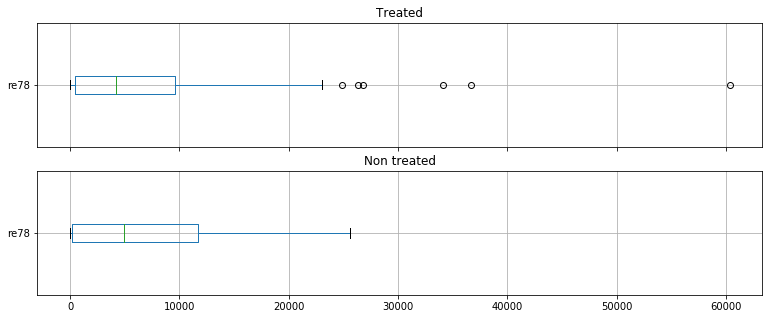

In [8]:
# boxplot of salaries of two groups
box_plot_outcomes(treated, non_treated, 'Non treated')

The box plots show us that while most of the real incomes of the treated groups tend to lie closer to the median, there are many more large outliers in that group than in the control group, as evidenced by the presence of multiple _fliers_.

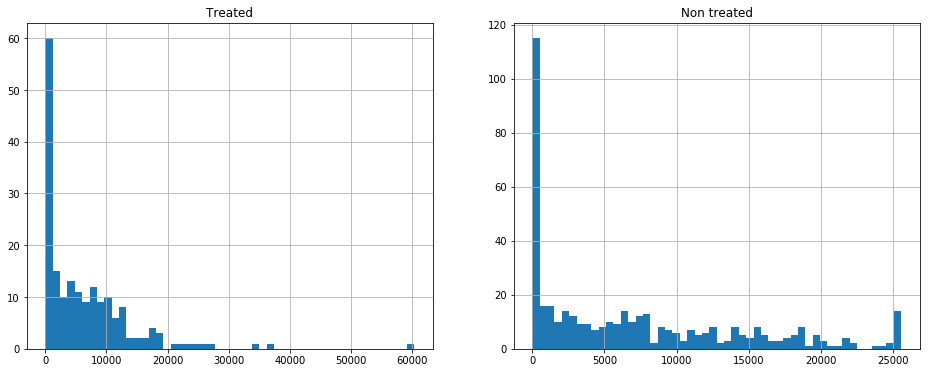

In [9]:
# histogram of salary for employed people in the two groups
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(121)
ax.set_title('Treated')
treated.re78.hist(ax=ax, bins=50)
ax = plt.subplot(122)
ax.set_title('Non treated')
non_treated.re78.hist(ax=ax, bins=50)

From these histograms we can clearly see that the distribution of the data is not normal and in fact it looks closer to a long-tailed distribution. We can use a log-log plot to verify whether the data follows a power law.

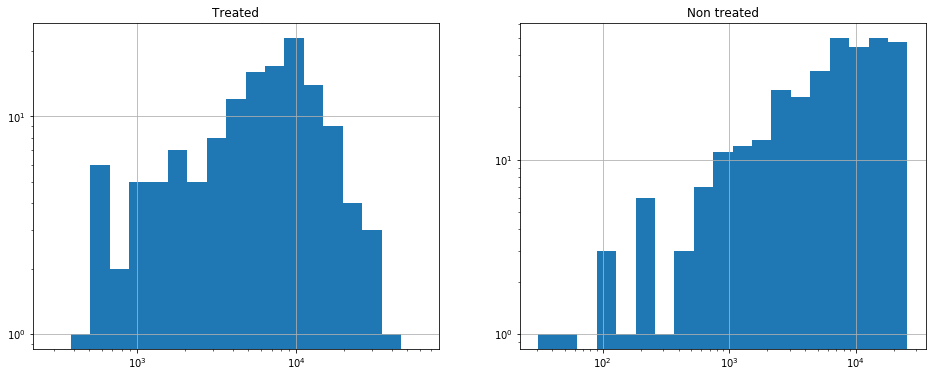

In [10]:
# log-log histogram
treated_no_zeros = treated[treated.re78 != 0]
non_treated_no_zeros = non_treated[non_treated.re78 != 0]

# Use custom bins for a logarithmic x axis
bins_treated = np.logspace(np.log10(min(treated_no_zeros.re78)), np.log10(max(treated_no_zeros.re78)), 20)
bins_non_treated = np.logspace(np.log10(min(non_treated_no_zeros.re78)), np.log10(max(non_treated_no_zeros.re78)), 20)

# Draw the plots
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(121)
ax.set_title('Treated')
treated_no_zeros.re78.hist(ax=ax, log=True, bins=bins_treated)
ax.set_xscale('log')

ax = plt.subplot(122)
ax.set_title('Non treated')
non_treated_no_zeros.re78.hist(ax=ax, log=True, bins=bins_non_treated)
ax.set_xscale('log')

We can see that the data doesn't follow a power law, as the log-log plot doesn't display a linear decrease. We can also try to plot a histogram of the logarithm of the real incomes for both groups.

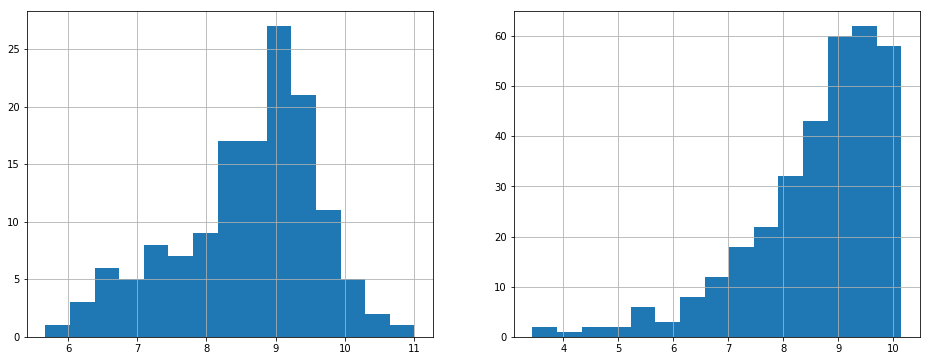

In [11]:
# histogram of log-salary
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(121)
np.log(treated_no_zeros.re78).hist(ax=ax, bins=15)
ax = plt.subplot(122)
np.log(non_treated_no_zeros.re78).hist(ax=ax, bins=15)

### Observations
The median salary of the treated groups is lower than that of the control group by about $600 which could suggest at the treatment is not helpful but on the contrary it tends to make the subjects perform worse. Another significant difference between the groups is that the treated groups has many outliers with very large income that are absent from the control group.

### Part 2: A closer look at the data
We will now compare the distribution of the other features in the two groups by plotting a histogram or pie chart for each group and feature: in order for the experiment to be meaningful all features need to have the same distriution in both groups.

First of all let's define some visualization helper functions.

In [12]:
def pie_treated_vs_control(treated_series, control_series, control_name, **kwargs):
    """Compare the value frequencies of two series using pie charts"""
    
    # Combining the two series in a single DataFrame produces more consistent coloring
    comp_df = pd.DataFrame({'Treated': treated_series, control_name: control_series})
    comp_df.plot.pie(**kwargs)

In [13]:
def hist_treated_vs_control(treated_series, control_series, title, control_name, ax=None, **kwargs):
    """Compare the value frequencies of two series using histograms"""
    if ax is None:
        _, ax = plt.subplots()
    
    ax.hist([treated_series.values, control_series.values],
            weights = [[1/len(treated_series)]*len(treated_series),
                       [1/len(control_series)]*len(control_series)],
            label=['Treated', control_name], **kwargs)
    
    ax.legend(prop={'size': 10})
    ax.set_title(title)
    ax.set_ylabel('Density')

In [14]:
def feature_comparison(treated_df, control_df, control_title):
    """Compare the distribution of features between two groups"""
    treated_race = (treated_df.black + 2 * treated_df.hispan).replace({0: 'White', 1: 'Black', 2: 'Hispanic'})
    control_race = (control_df.black + 2 * control_df.hispan).replace({0: 'White', 1: 'Black', 2: 'Hispanic'})
    pie_treated_vs_control(treated_race.value_counts(), control_race.value_counts(), control_title,
                            subplots=True, title='Race', legend=False)
    
    treated_married = treated_df.married.replace({0: 'Not married', 1: 'Married'})
    control_married = control_df.married.replace({0: 'Not married', 1: 'Married'})
    pie_treated_vs_control(treated_married.value_counts(), control_married.value_counts(), control_title,
                             subplots=True, legend=False, title='Marital status')
    
    treated_nodegree = treated_df.nodegree.replace({0: 'Degree', 1: 'No degree'})
    control_nodegree = control_df.nodegree.replace({0: 'Degree', 1: 'No degree'})
    pie_treated_vs_control(treated_nodegree.value_counts(), control_nodegree.value_counts(), control_title,
                            subplots=True, legend=False, title='Higher education')
    
    fig = plt.figure(figsize=(13, 8))
    
    ax1, ax2 = plt.subplot(221), plt.subplot(222)
    hist_treated_vs_control(treated_df.age, control_df.age, 'Age', control_title, ax=ax1)
    hist_treated_vs_control(treated_df.educ, control_df.educ, 'Length of education in years', control_title, ax=ax2)
    
    ax3, ax4 = plt.subplot(223), plt.subplot(224)
    hist_treated_vs_control(treated_df.re74, control_df.re74, 'Real income in 1974', control_title, ax=ax3)
    hist_treated_vs_control(treated_df.re75, control_df.re75, 'Real income in 1975', control_title, ax=ax4)

We chose to use pie charts for our categorical features (race, marital status and degree) and histogams for all others.

Now we can compare the distribution of the features between the treated group and the control group.

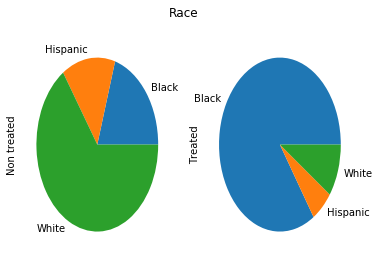

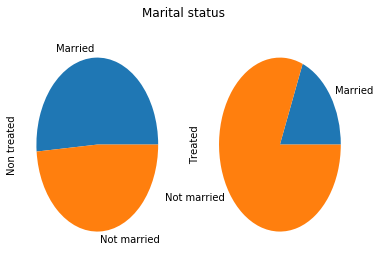

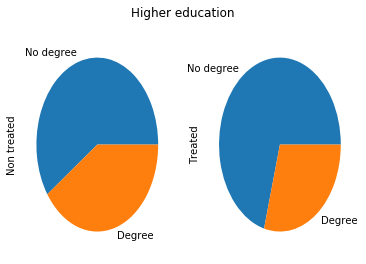

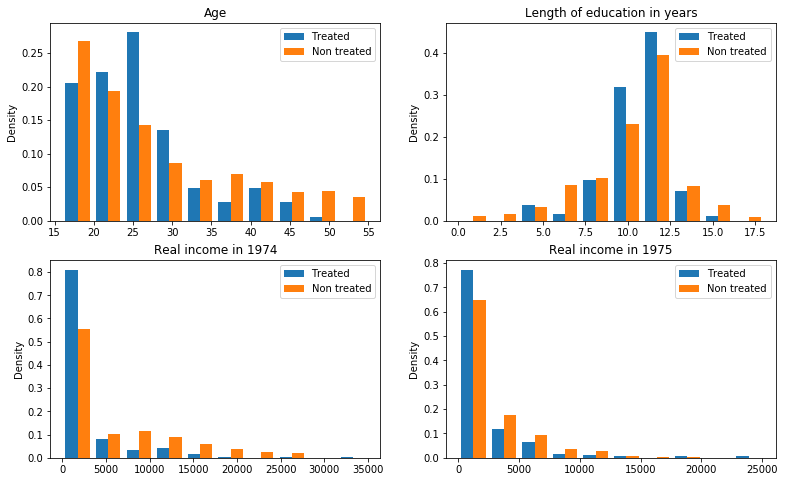

In [15]:
feature_comparison(treated, non_treated, 'Non treated')

#### Observations
It's clear that the test subjects are not well matched between the two groups, and this is especially evident when comparing the distribution of feature like race and marital status. Therefore it can be argued that any results obtained by simply comparing the treated group with the control group are invalid because any differences could be due to factors other than the treatment itself.

### Part 3: A propsensity score model

We'll use logistic regression to compute a propensity score based on all pre-treatment features for all subjects. This is an estimation of the probability that a subject will receive the treatment. We need to use one-hot encoding (i.e. encode each of them using a group of binary features, with only one active at a time for each group). In this case the only columns that we need to add are a `degree` column, the complimentary of `nodegree` and a `non_married`, complimentary of `married`, because the subjects' race is already using one-hot encoding.

In [16]:
# One-hot encoding for degree and marital status
df['degree'] = 1 - df.nodegree
df['non_married'] = 1 - df.married

# Feature columns
tx = df[['age', 'educ', 'black', 'hispan', 'white', 'non_married', 'married', 'degree', 'nodegree', 're74', 're75']]
# Label column
y = df['treat']

# Fit a logistic model to the data
logistic = linear_model.LogisticRegression()
logistic.fit(tx, y)

# Use the model to predict a propensity score
prop_score = logistic.predict_proba(tx)

# Add the propensity score to a copy of our original dataframe
with_propensity = df.copy()
with_propensity['propensity_score'] = prop_score[..., 1]

# Dataframes for treated and control groups
treated_with_propensity = with_propensity[with_propensity.treat == 1]
non_treated_with_propensity = with_propensity[with_propensity.treat == 0]

In [17]:
with_propensity.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white,degree,non_married,propensity_score
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0,0,0,0.460341
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0,0,1,0.320438
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0,1,1,0.637193
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0,0,1,0.673346
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0,0,1,0.679717


### Part 4: Balancing the dataset via matching

We will now use NetworkX to create an undirected graph where each node corresponds to a subject in the experiment and the edges only connect nodes belonging to two different groups. This is known as a _bipartite graph_.

After that we will assign to each edge a weight equal to minus the absolute value of the difference in propensity score of the nodes it connects. This way we'll be able to to select the best candidates for our new control group by selecting the set of edges that maximize the sum of their weights (implemented in NetworkX as `max_weight_matching`).

For this to work it is important that each node is connected to each member of the opposite group by exactly one edge (_complete bipartite graph_).

In [18]:
def make_propensity_graph(treated_df, control_df):
    """Create a new complete bipartite graph for the two groups"""
    treated_len = treated_df.shape[0]
    non_treated_len = non_treated_with_propensity.shape[0]
    
    # Create the graph
    G = nx.complete_bipartite_graph(treated_len, non_treated_len)
    
    set_edge_weights(G, treated_df, control_df)
    return G

In [19]:
def set_edge_weights(G, treated_df, control_df):
    """
    Assign a weight to each edge of the graph according to the difference
    between the two nodes' propensity score
    """
    treated_len = treated_df.shape[0]
    weights = {}

    # Compute a weight for each edge
    for edge in G.edges():
        edge_wt = treated_df.iloc[edge[0]]['propensity_score'] - \
            control_df.iloc[edge[1] - treated_len]['propensity_score']
            
        # The algorithm *maximizes* the sum of the weights and we want the
        # difference in propensity score to be as small as possible so we
        # need to use negative values
        weights[edge] = -abs(edge_wt)

    # The algorithm requires each edge to have a 'weight' attribute
    nx.set_edge_attributes(G, weights, 'weight')
    

In [20]:
def make_matched_groups(G, treated_df, control_df):
    """
    Use the weights assigned to the edges to find the subset
    of the control group that best matches the treated group
    """
    treated_len = treated_df.shape[0]
    
    # Returns a dictionary mapping nodes to nodes
    match = nx.max_weight_matching(G, maxcardinality=True)
    
    # In NetworkX each node of the bipartite graph has an integer label
    # so we need to use that as an index into the dataframe.
    # Indices in the second dataframe are shifted up by the length of the first one.
    # E.g. treated_len + 1 corresponds to the second element of the control dataframe.
    matched_control_df = pd.DataFrame([
       control_df.iloc[match[i] - treated_len] for i in range(treated_len) if i in match
    ])
    
    matched_treated_df = pd.DataFrame([
       treated_df.iloc[i] for i in range(treated_len) if i in match
    ])
    
    return matched_control_df, matched_treated_df

Now let's create the graph and find the best match

In [21]:
graph = make_propensity_graph(treated_with_propensity, non_treated_with_propensity)

In [22]:
control_match, _ = make_matched_groups(graph, treated_with_propensity, non_treated_with_propensity)

In [23]:
control_match.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white,degree,non_married,propensity_score
392,PSID208,0,16,9,0,0,0,1,0.00,1188.7740,2451.548,1,0,1,0.178347
243,PSID59,0,36,12,1,0,1,0,11040.47,6221.3710,7215.739,0,1,0,0.320331
609,PSID425,0,18,11,0,0,0,1,0.00,0.0000,10150.500,1,0,1,0.158035
561,PSID377,0,16,9,0,0,0,1,0.00,0.0000,4974.028,1,0,1,0.171952
445,PSID261,0,16,9,0,0,0,1,0.00,320.4677,3707.616,1,0,1,0.173658


In [24]:
# Verify that the two groups have the same number of members
control_match.shape[0] == treated.shape[0]

True

This is the subset of the control group that best matches the treated group in terms of difference in propensity score.
Let's use the income of this group in 1978 to evaluate the effectiveness of the program.

In [25]:
describe_outcomes(treated, control_match, 'Matched control group')

,Matched control group,Treated
count,185.000000,185.000000
mean,5562.450366,6349.143530
std,5850.571807,7867.402218
min,0.000000,0.000000
25%,116.740400,485.229800
50%,3892.332000,4232.309000
75%,8154.095000,9642.999000
max,20243.380000,60307.930000


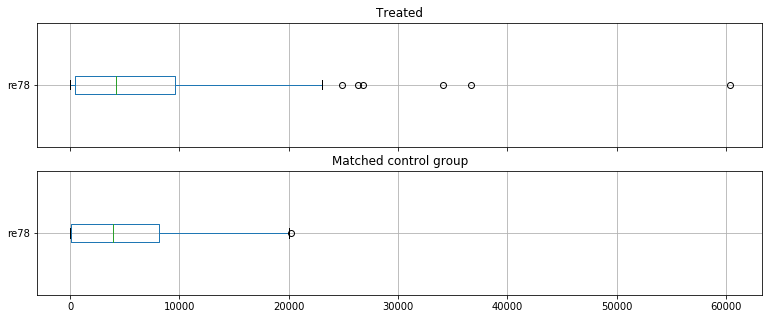

In [26]:
box_plot_outcomes(treated, control_match, 'Matched control group')

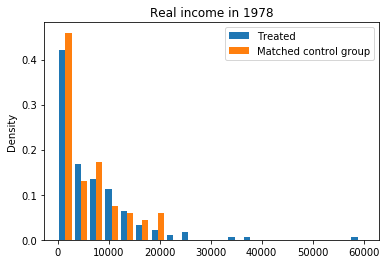

In [27]:
hist_treated_vs_control(treated.re78, control_match.re78, 'Real income in 1978', 'Matched control group', bins=20)

After doing propensity score matching the median income of the subjects who received treatment is actually higher than those who didn't, and looking at the histogram suggest that unemployment is higher in the control group. However before we can draw any conclusion we have to verify how well our matching algorithm really worked.

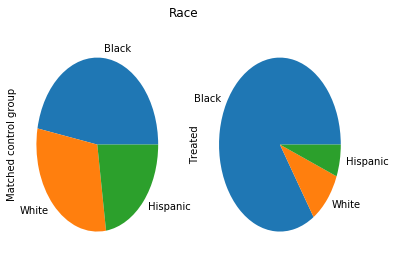

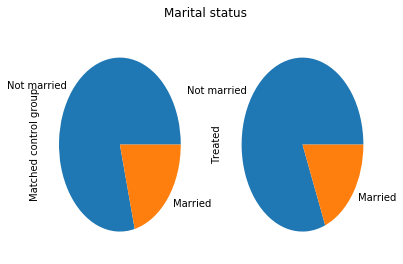

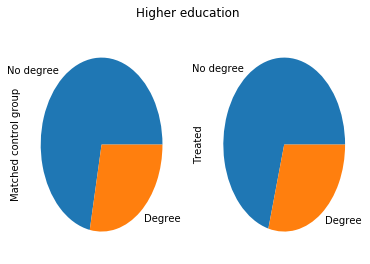

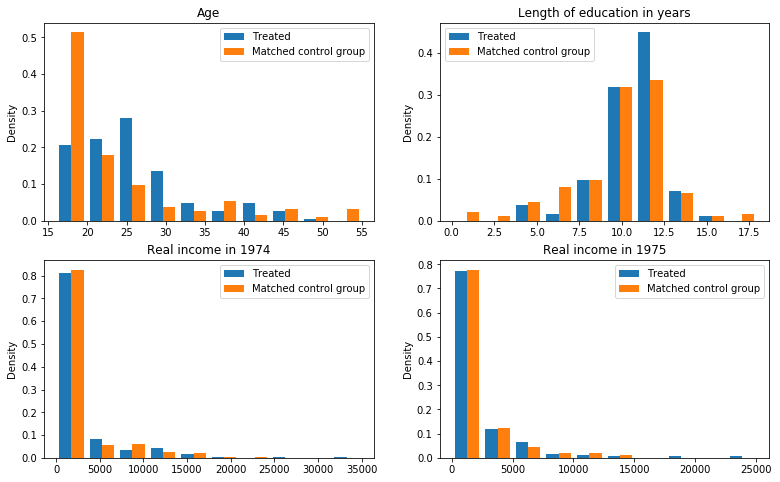

In [28]:
feature_comparison(treated, control_match, 'Matched control group')

Even though propensity score matching made the distribution of most feature more similar between groups, the distribution of race (and to a lesser degree age) are still different. We still cannot draw meaningful conclusions by comparing the incomes of the two groups.

### Part 5: Balancing the groups further

Idea: we can improve our result by removing edges that connect two subjects whose race is different because the algorithm we are using will only match subjects that are connected by an edge.

Problem: there are more black subjects in the treated group than there are in the control group and so we need to remove part of the treated subjects.

Other ideas:
* If the race of the two subjects is different drop the edge with a fixed probability.
* Assign a very negative weight to such edges.

While the latter two ideas would have allowed us to not remove any subjects from the treated group we found that they both failed to make the distribution of features of the two groups acceptably similar. Therefore we decided to go with the first approach even though this forced us to sacrifice some of the data.

In [29]:
def prune_edges(G, treated_df, control_df):
    """Return a copy of the graph where all edges where
    the race of the two subjects is different removed"""
    G2 = G.copy()
    treated_len = treated_df.shape[0]
    control_len = control_df.shape[0]
    
    # All edges that connect two subjects
    edges_to_remove = [
        (i, j + treated_len)
        for i in range(treated_len)
        for j in range(control_len)
        if treated_df.black.iloc[i] != control_df.black.iloc[j] or
           treated_df.hispan.iloc[i] != control_df.hispan.iloc[j]# or
           #treated_df.age.iloc[i] != control_df.age.iloc[j]
    ]

    G2.remove_edges_from(edges_to_remove)
    
    return G2

In [30]:
graph2 = prune_edges(graph, treated_with_propensity, non_treated_with_propensity)

In [31]:
# New groups
(control_match_2, treated_match_2) = make_matched_groups(graph2, treated_with_propensity, non_treated_with_propensity)

In [32]:
# Check how many subjects are in each group and that the size of the groups matches
control_match_2.shape[0], control_match_2.shape[0] == treated_match_2.shape[0]

(116, True)

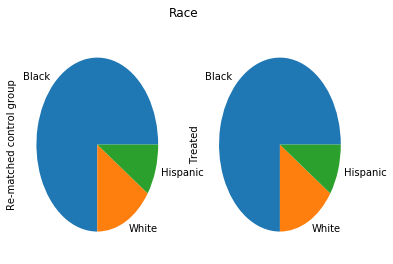

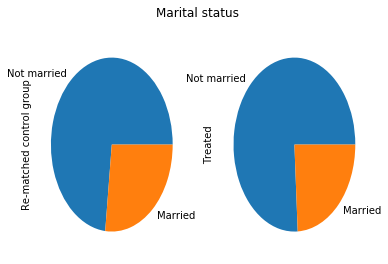

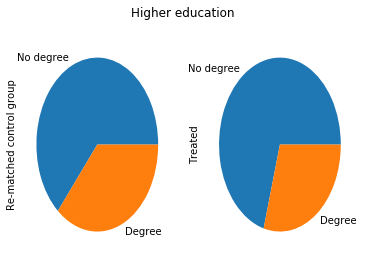

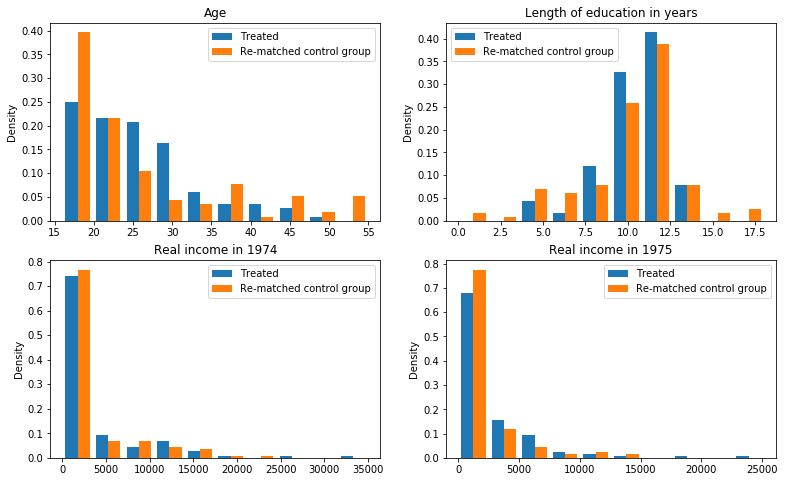

In [33]:
# Compare the distribution of features
feature_comparison(treated_match_2, control_match_2, 'Re-matched control group')

We can see that the age distribution is still not a perfect match but removing even more edges from the graph would have left us with very little data and assigning a very large negative weight to pairs with very different ages didn't result in a better match. The degree to which all other features are matched is satisfactory.

### Part 6: A less naive analysis
We can finally draw more meaningful conclusions about the effectiveness of the job training program. As before let's first have a look at some descriptive statistic. We already know that we cannot use mean and standard deviation so we'll focus on the quantiles instead.

In [34]:
describe_outcomes(treated_match_2, control_match_2, 'Re-matched control group')

,Re-matched control group,Treated
count,116.000000,116.000000
mean,4945.989119,6916.583354
std,5896.649599,8249.970638
min,0.000000,0.000000
25%,0.000000,666.459125
50%,2256.488500,5336.144500
75%,7540.469250,9940.204750
max,20243.380000,60307.930000


Contrary to our very first analysis, these number suggests that the training program was in fact very effective, with the median salary of the treated group in 1978 being more than twice as high than the median salary of the control group.

Visualizing the distribution with box plots and histograms will give us additional information

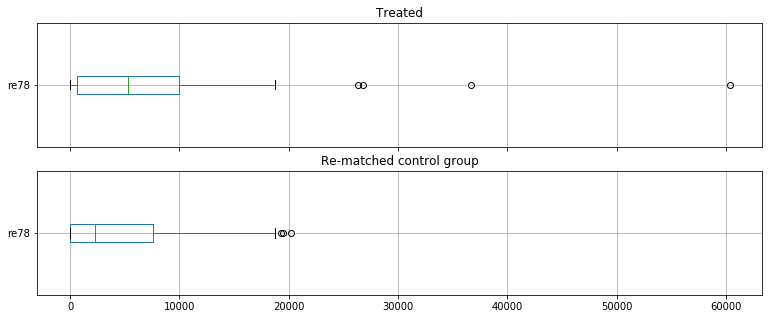

In [35]:
box_plot_outcomes(treated_match_2, control_match_2, 'Re-matched control group')

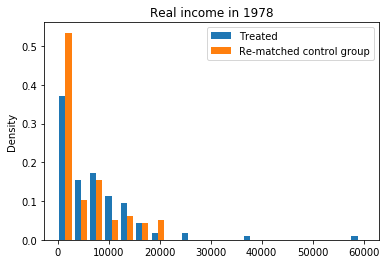

In [36]:
hist_treated_vs_control(treated_match_2.re78, control_match_2.re78, 'Real income in 1978', 'Re-matched control group', bins=20)

We can see from the box plots that even if we disregard the outliers the income of the treated group is decidedly higher: the lower quartile, medium, and upper quartile of the treated group are all higher than that of the control group. We can also see from the histogram that subjects who received the treatment are less likely to be unemployed or have a very low salary. Therefore we can conclude that after matching, unlike what our initial analysis suggested, the job training program leads to overall higher income.

## Question 2
Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency-inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).

### Strategy:

#### Part 1
##### Dataset Preparation
1. We prepare the 20newsgroup dataset by loading the documents and labels into a dataframe. 
2. We split the data into train (80%), validation (10%), and test (10%) sets. We will use the training set to train our classifier, the validation set to optimize the parameters for our classifier, and the test set to evaluate our classifier. 
3. Using the TFIDFVectorizer module from sklearn, we calculate the term frequency-inverse document frequency for our word features for every document. 

#### Part 2
##### Train a Random Forest Classifier (and make improvements by finding the best parameters)
1. We create the default classifier and evaluate our classifier using the test set. 
2. We use grid search to find the best input values for the parameters n_estimators and max_depth
3. We create another classifier using the best parameters and compare this to our original classifier.
4. We observe and analyze the confusion matrix

##### Further improvements: feature reduction
1. We observe the feature importances attribute of our random forest classifier, and see the effects of reducing our feature vector.

###### Dataset Preparation:
1). We first prepare the 20newsgroup dataset by loading the documents and labels into a dataframe. 

In [37]:
# Import the necessary modules
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from scipy.sparse import vstack
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# Load the 20newsgroups dataset into a dataframe
twenty_news = fetch_20newsgroups(subset = 'all')
news = pd.DataFrame({'Document': twenty_news.data,
                     'Label':    twenty_news.target})
news.Label.replace(range(20), twenty_news.target_names, inplace=True)
news.head()

,Document,Label
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,rec.sport.hockey
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,comp.sys.ibm.pc.hardware
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,talk.politics.mideast
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,comp.sys.ibm.pc.hardware
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,comp.sys.mac.hardware


2). We split the dataset into three sets: Training Set (80%), Validation Set (10%), and Test Set(10%). We will also plot the distribution of classes for each set.

In [39]:
# Split the dataset/dataframe into train, valid, and test set
train, testval = train_test_split(news, test_size=0.2, random_state = 1)
test, valid = train_test_split(testval, test_size=0.5, random_state = 1)

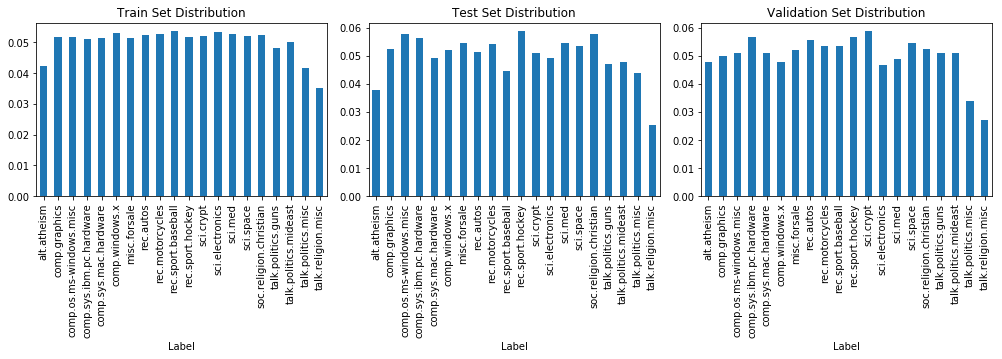

In [40]:
# Plot the distribution of documents among the categories for the three sets
fig, axs = plt.subplots(1,3, figsize = (14, 3))
plt.tight_layout()

# Training set distribution
axs[0].set_title('Train Set Distribution')
train_distr_norm = train.groupby('Label').size()/train.shape[0]
train_distr_norm.plot(kind = 'bar', ax = axs[0])

# Test set distribution
axs[1].set_title('Test Set Distribution')
test_distr_norm = test.groupby('Label').size()/test.shape[0]
test_distr_norm.plot(kind = 'bar', ax = axs[1])

# Validation set distribution
axs[2].set_title('Validation Set Distribution')
valid_distr_norm = valid.groupby('Label').size()/valid.shape[0]
valid_distr_norm.plot(kind = 'bar', ax = axs[2])

plt.show()

In [41]:
size = train.groupby('Label').size()
print("No. Documents in smallest class: ", size.loc[size == size.min()].index[0], size.min())
print("No. Documents in largest class: ", size.loc[size == size.max()].index[0], size.max())

No. Documents in smallest class:  talk.religion.misc 529
No. Documents in largest class:  rec.sport.baseball 809


#### Observations:
There are only small differences in the distributions of the train, test, and validation sets. In addition, the distribution over the classes in the train set are generally well distributed with the smallest training class being talk.religion.misc with 529 training documents, and the largest training class being rec.sport.baseball with 809 training documents.

3). Using the TFIDFVectorizer module from sklearn, we calculate the term frequency-inverse document frequency for our word features for every document. 

In [42]:
# Compute TF-IDF feature of every document
count_vect = TfidfVectorizer()

In [43]:
# Learn the vocabulary and inverse document frequency (idf) from the training set, 
# then transform the documents in the training set to a document-term matrix
X_train_counts = count_vect.fit_transform(train.Document)

# Using the vocabulary and idf learned from the training set, transform the validation and 
# test set documents to a document-term matrix
X_valid_counts = count_vect.transform(valid.Document)
X_test_counts = count_vect.transform(test.Document)

In [44]:
# Have a look at the one of the training document
token_map = count_vect.get_feature_names()
feature = X_train_counts[10,:].toarray().flatten()
index = np.argsort(feature)
print('Top 10 tokens with largest TF-IDF:\n')
print('{:<20} {}'.format('Token', 'TF-IDF'))
for i in range(-1,-10,-1):
    print('{:<20} {}'.format(token_map[index[i]], feature[index[i]]))
print('\nTarget:', train.Label.iloc[10])
print('Document:\n')
print(train.Document.iloc[10])

Top 10 tokens with largest TF-IDF:

Token                TF-IDF
rubin                0.3162154064438425
cis                  0.22777957961994075
ohio                 0.2035299273271303
cycles               0.20274909719778142
hut                  0.19076250929210406
gamma                0.18735589336133643
controller           0.1519878915821879
software             0.14846052383257052
fi                   0.14691808429372372

Target: sci.electronics
Document:

From: iisakkil@gamma.hut.fi (Mika Iisakkila)
Subject: Re: what to do with old 256k SIMMs?
In-Reply-To: rubin@cis.ohio-state.edu's message of 17 Apr 1993 14:05:06 -0400
Nntp-Posting-Host: gamma.hut.fi
Organization: Helsinki University of Technology, Finland
	<1qpgsiINN31p@diplodocus.cis.ohio-state.edu>
Lines: 15

rubin@cis.ohio-state.edu (Daniel J Rubin) writes:
>How hard would it be to somehow interface them to some of the popular 
>Motorola microcontrollers.

Not hard, you can do the refreshing and access cycles by software, bu

#### Observations:
TF-IDF is a weight often used to evaluate how important a word is to a document in a corpus. It measures how frequently a term appears in a document downweighted by how often the term appears among the documents in the corpus. 
From this document we can see that the term frequencies are being calculated as expected, with the sender's email and affiliation being among the most frequent tokens. In addition, we can see that tokens that describe the electronics, such as 'controller', 'cycles', 'software' are also among the top TFIDF scores.

### Question 2, Part 2
Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

##### Train a Random Forest Classifier (and make improvements by finding the best parameters)
1). We create the default classifier and evaluate our classifier using the test set. 

In [46]:
# Create a random forest classifier using the default parameters: n_estimators = 10, max_depth = None
rfc = RandomForestClassifier(random_state = 10)

# Train on the train set
rfc.fit(X_train_counts,train.Label)

# Predict on test set
predicted = rfc.predict(X_test_counts)
print("Default Random Forest Classifier Evaluation")
print(classification_report(test.Label, predicted))
print("Accuracy = ", accuracy_score(test.Label, predicted))

Default Random Forest Classifier Evaluation
                          precision    recall  f1-score   support

             alt.atheism       0.57      0.72      0.63        71
           comp.graphics       0.39      0.58      0.46        99
 comp.os.ms-windows.misc       0.50      0.62      0.56       109
comp.sys.ibm.pc.hardware       0.44      0.53      0.48       106
   comp.sys.mac.hardware       0.50      0.61      0.55        93
          comp.windows.x       0.67      0.67      0.67        98
            misc.forsale       0.66      0.73      0.69       103
               rec.autos       0.64      0.67      0.65        97
         rec.motorcycles       0.78      0.75      0.76       102
      rec.sport.baseball       0.69      0.73      0.71        84
        rec.sport.hockey       0.85      0.77      0.81       111
               sci.crypt       0.86      0.84      0.85        96
         sci.electronics       0.59      0.45      0.51        93
                 sci.med       

#### Observations:

We see that our accuracy (65.6%) for the default classifier is decent but could possibly be improved. In addition, if we look at the specific classes, some classes have low f1 scores and some have high. For example, talk.religion.misc has an f1 score of 0.5. The classifier has a harder time labeling documents in this class. We know that this class had the least training documents, but in addition, perhaps, the training features overlapped with those of the class soc.religion.christian. In that case, many talk.religion.misc documents in our test set could have been mislabeled as soc.religion.christian documents. 

On the other hand, the classifier performed the best at classifying documents of the talk.politics.mideast category with very high precision and high recall. This could be due to the fact that there are many tokens/features that are specific to this category.

2). We use grid search to find the best input values for the parameters n_estimators and max_depth

In [47]:
# Values of parameters to test
params_grid = {"n_estimators" : [10, 20, 50, 100, 120, 150],
              "max_depth" : [20, 50, 100, 120, 150]}

# Initialize classifier and varibles to store the results
rfc = RandomForestClassifier(random_state = 10)
best_score, best_params = 0, None

# Use ParameterGrid() to create all combinations of settings
for kwarg in ParameterGrid(params_grid):
    rfc.set_params(**kwarg)
    rfc.fit(X_train_counts, train.Label)
    predicted = rfc.predict(X_valid_counts)
    score = accuracy_score(valid.Label, predicted)
    
    # Keep the best setting
    if(score>best_score):
        best_score, best_params = score, kwarg
    print('Score: {:.10f}, Parameters: {}'.format(score, kwarg))

print('\nBest settings:')
print('Score: {:.10f}, Parameters: {}'.format(best_score, best_params))

Score: 0.5177718833, Parameters: {'max_depth': 20, 'n_estimators': 10}
Score: 0.6196286472, Parameters: {'max_depth': 20, 'n_estimators': 20}
Score: 0.7395225464, Parameters: {'max_depth': 20, 'n_estimators': 50}
Score: 0.7766578249, Parameters: {'max_depth': 20, 'n_estimators': 100}
Score: 0.7851458886, Parameters: {'max_depth': 20, 'n_estimators': 120}
Score: 0.7846153846, Parameters: {'max_depth': 20, 'n_estimators': 150}
Score: 0.6270557029, Parameters: {'max_depth': 50, 'n_estimators': 10}
Score: 0.7331564987, Parameters: {'max_depth': 50, 'n_estimators': 20}
Score: 0.8063660477, Parameters: {'max_depth': 50, 'n_estimators': 50}
Score: 0.8381962865, Parameters: {'max_depth': 50, 'n_estimators': 100}
Score: 0.8371352785, Parameters: {'max_depth': 50, 'n_estimators': 120}
Score: 0.8413793103, Parameters: {'max_depth': 50, 'n_estimators': 150}
Score: 0.6763925729, Parameters: {'max_depth': 100, 'n_estimators': 10}
Score: 0.7740053050, Parameters: {'max_depth': 100, 'n_estimators': 20

#### Observations: 
Here, we wanted to evaluate the best parameters for max_depth, and n_estimators so we performed a grid search. Our best parameters are max_depth = 100 and n_estimators = 100. If we expand the nodes of the trees past a depth of 100, the classifier accuracy does not really improve. In addition, increasing the number of trees in the forest past 100, decreases the accuracy. 

In [48]:
from scipy.sparse import vstack
import matplotlib.pyplot as plt
%matplotlib inline

3). We create another classifier using the best parameters and compare this to our original classifier.

In [49]:
# Create a classifier with parameters obtained from grid search
rfc = RandomForestClassifier(**best_params, random_state = 10)

# Train on the train set
rfc.fit(X_train_counts,train.Label)

# Predict on test set
predicted = rfc.predict(X_test_counts)
print("Improved Random Forest Classifier Evaluation")
print(classification_report(test.Label, predicted))
print("Accuracy = ", accuracy_score(test.Label, predicted))

Improved Random Forest Classifier Evaluation
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.85      0.85        71
           comp.graphics       0.70      0.77      0.73        99
 comp.os.ms-windows.misc       0.76      0.87      0.81       109
comp.sys.ibm.pc.hardware       0.76      0.73      0.74       106
   comp.sys.mac.hardware       0.85      0.85      0.85        93
          comp.windows.x       0.85      0.81      0.83        98
            misc.forsale       0.69      0.87      0.77       103
               rec.autos       0.89      0.80      0.84        97
         rec.motorcycles       0.90      0.92      0.91       102
      rec.sport.baseball       0.94      0.90      0.92        84
        rec.sport.hockey       0.96      0.97      0.97       111
               sci.crypt       0.90      0.95      0.92        96
         sci.electronics       0.75      0.68      0.71        93
                 sci.med      

#### Observations:
We created a second classifier with the best parameters found with the grid search algorithm. All metrics (accuracy, precision, recall, f1) improved. If we look at the specific classes, we still see that talk.relgion.misc has a lower f1 score compared to the other classes. Specifically, there is high precision but low recall. This means that the majority of test documents labeled as talk.religion.misc were actually correctly labeled; however, of all the documents that are truly talk.religion.misc, we only labeled 50% of them. As mentioned for the default classifier, this could be due to the fact that there are overlapping features that represent soc.religion.christian and talk.religion.misc, so many talk.religion.misc could be mislabeled as soc.religion.christian. We can see that this is possible because in soc.religion.christian, precision isn't as high as recall, so some documents labeled as soc.religion.christian were not labeled correctly.

Our average (weighted) F1 score is 0.84 which is a good improvement from 0.66.

4). We observe and analyze the confusion matrix

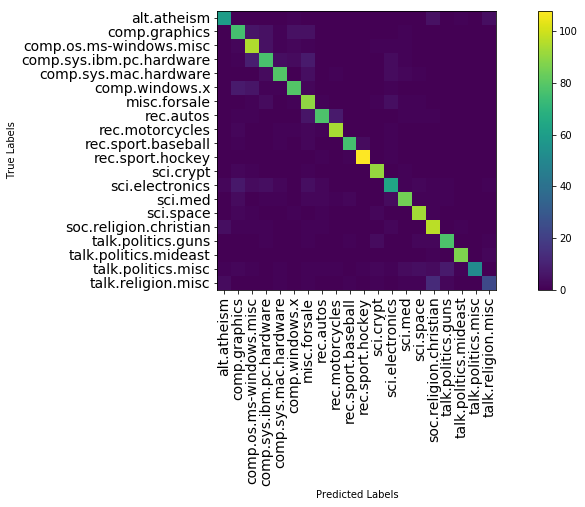

In [50]:
# Plot confusion matrix
cm = confusion_matrix(test.Label, predicted)
ax = plt.matshow(cm)
plt.gcf().set_size_inches((15,5))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(range(20), twenty_news.target_names, rotation=90, fontsize=14)
plt.yticks(range(20), twenty_news.target_names, fontsize=14)
plt.gca().xaxis.set_ticks_position('bottom')
_=plt.colorbar()

#### Observations: 
As we mentioned in previous observations, there could be overlapping features that are highly indicative of multiple classes. In other words, the tokens that are representative (in terms of TFIDF) of sci.electronics could overlap with those representative of comp.* classes. The confusion matrix demonstrates this because a fraction of sci.electronics documents are being mislabeled as comp.graphics, comp.sys.ibm.pc.hardware, comp.sys.mac.hardware, etc. We also see this with the ongoing example of talk.religion.misc. As suspected, many talk.religion.misc documents are being mislabeled as alt.atheism and soc.religion.christian. The documents under the classes starting with comp. are being mislabeled as each other (because the topic domains of the classes are similar).

##### Further improvements: feature reduction
1. We observe the feature importances attribute of our random forest classifier, and see the effects of reducing our feature vector.

In [51]:
# Investigate feature importance
index = np.argsort(rfc.feature_importances_)[::-1]
importance = rfc.feature_importances_
importance_std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
                        axis=0)
print("Top 10 features")
# for i in range(index.shape[0]-20, index.shape[0]):
for i in range(10):
    print('Importance: {:.6f} +- {:.6f}, {}'.format(importance[index[i]],
                                                    importance_std[index[i]],
                                                    token_map[index[i]]))
    
# Investigate feature importance
index = np.argsort(rfc.feature_importances_)[::-1]
importance = rfc.feature_importances_
importance_std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
                        axis=0)
print("Bottom 10 features")
for i in range(index.shape[0]-10, index.shape[0]):
# for i in range(10):
    print('Importance: {:.6f} +- {:.6f}, {}'.format(importance[index[i]],
                                                    importance_std[index[i]],
                                                    token_map[index[i]]))
    

Top 10 features
Importance: 0.004903 +- 0.006005, windows
Importance: 0.004488 +- 0.006738, dod
Importance: 0.004106 +- 0.007367, clipper
Importance: 0.003912 +- 0.004491, car
Importance: 0.003513 +- 0.006603, sale
Importance: 0.003448 +- 0.005363, bike
Importance: 0.002867 +- 0.002400, re
Importance: 0.002795 +- 0.004363, god
Importance: 0.002743 +- 0.004011, cars
Importance: 0.002612 +- 0.003720, space
Bottom 10 features
Importance: 0.000000 +- 0.000000, izer
Importance: 0.000000 +- 0.000000, izetbegovic
Importance: 0.000000 +- 0.000000, izf
Importance: 0.000000 +- 0.000000, izf0
Importance: 0.000000 +- 0.000000, izfm
Importance: 0.000000 +- 0.000000, izh
Importance: 0.000000 +- 0.000000, izi
Importance: 0.000000 +- 0.000000, izk
Importance: 0.000000 +- 0.000000, izkgt
Importance: 0.000000 +- 0.000000, ÿhooked


#### Observations:

The importance measured in the `feature_importance_` attribute by default is called "Gini importance". It is defined as the decrease of impurity contributed by a feature averaged over all decision trees in the forest.

Most of the top 10 important features are clearly related to a certain class: sale, DoD, Windows, car/cars, space, bike directly relate to the topics misc.forsale, talk.politics.guns, comp.os.ms-windows.misc, rec.autos, sci.space, rec.motorcycles respectively. This is reasonable because these are the keywords of topics and should be helpful for classifying documents. However, there are also some words, such as the, of, re, that do not have a direct link with the topics.

This is a clear contrast to the bottom of the list. The features are not even real words: they could be e-mail address, misspelled words, or some abbrivation that do not appear frequently. The (almost) zero importance implies that either these words are useless for classification or they are never used in the algorithm.


In [52]:
# Feature selection based on feature importance
from sklearn.feature_selection import SelectFromModel

In [53]:
sfm = SelectFromModel(rfc, threshold='mean')
sfm.fit(X_train_counts, train.Label)
sel_train = sfm.transform(X_train_counts)
sel_valid = sfm.transform(X_valid_counts)
sel_test = sfm.transform(X_test_counts)

In [54]:
print(X_train_counts.shape)
print(sel_train.shape)

(15076, 159262)
(15076, 13606)


In [55]:
# Create a classifier with selected features
sel_rfc = RandomForestClassifier(**best_params, random_state = 10)

# Train on the train set
sel_rfc.fit(sel_train, train.Label)

# Predict on test set
predicted = sel_rfc.predict(sel_test)
print("Improved Random Forest Classifier Evaluation with Feature reduction")
print(classification_report(test.Label, predicted))
print("Accuracy = ", accuracy_score(test.Label, predicted))

Improved Random Forest Classifier Evaluation with Feature reduction
                          precision    recall  f1-score   support

             alt.atheism       0.88      0.86      0.87        71
           comp.graphics       0.74      0.71      0.72        99
 comp.os.ms-windows.misc       0.76      0.91      0.83       109
comp.sys.ibm.pc.hardware       0.72      0.74      0.73       106
   comp.sys.mac.hardware       0.85      0.78      0.82        93
          comp.windows.x       0.86      0.81      0.83        98
            misc.forsale       0.80      0.88      0.84       103
               rec.autos       0.90      0.79      0.84        97
         rec.motorcycles       0.92      0.91      0.92       102
      rec.sport.baseball       0.83      0.87      0.85        84
        rec.sport.hockey       0.96      0.93      0.94       111
               sci.crypt       0.92      0.97      0.94        96
         sci.electronics       0.64      0.72      0.68        93
       

In [56]:
# Investigate feature importance based on selected features
sel_index = sfm.get_support(indices=True)
index = np.argsort(sel_rfc.feature_importances_)[::-1]
importance = sel_rfc.feature_importances_
importance_std = np.std([tree.feature_importances_ for tree in sel_rfc.estimators_],
                        axis=0)
print("Top 10 features")
for i in range(10):
    print('Importance: {:.6f} +- {:.6f}, {}'.format(importance[index[i]],
                                                    importance_std[index[i]],
                                                    token_map[sel_index[index[i]]]))
    
# Investigate feature importance
sel_index = sfm.get_support(indices=True)
index = np.argsort(sel_rfc.feature_importances_)[::-1]
importance = sel_rfc.feature_importances_
importance_std = np.std([tree.feature_importances_ for tree in sel_rfc.estimators_],
                        axis=0)
print("Bottom 10 features")
for i in range(index.shape[0]-10, index.shape[0]):
    print('Importance: {:.6f} +- {:.6f}, {}'.format(importance[index[i]],
                                                    importance_std[index[i]],
                                                    token_map[sel_index[index[i]]]))

Top 10 features
Importance: 0.010257 +- 0.007890, windows
Importance: 0.009047 +- 0.008352, dod
Importance: 0.008308 +- 0.008154, sale
Importance: 0.008296 +- 0.006019, car
Importance: 0.006106 +- 0.006229, bike
Importance: 0.005923 +- 0.005219, space
Importance: 0.005659 +- 0.007191, clipper
Importance: 0.005630 +- 0.005889, hockey
Importance: 0.005448 +- 0.004752, cars
Importance: 0.005298 +- 0.004973, god
Bottom 10 features
Importance: 0.000000 +- 0.000000, communion
Importance: 0.000000 +- 0.000000, lucifer
Importance: 0.000000 +- 0.000000, heinous
Importance: 0.000000 +- 0.000000, randal
Importance: 0.000000 +- 0.000000, lud
Importance: 0.000000 +- 0.000000, 5366
Importance: 0.000000 +- 0.000000, 5363
Importance: 0.000000 +- 0.000000, orbiter
Importance: 0.000000 +- 0.000000, brashear
Importance: 0.000000 +- 0.000000, catching



#### Observation:

For the quantitative results, f1-score remains the same as 0.84 and the difference in accuracy is 0.3%. Even though the result is slightly worse, the computation time is significantly improved because the number of features is reduced by 90%.
Also, the most important features remain roughly the same. It is even better in the sense that there is no preposition in the top list and all the top words has a clear correspondence to some topics.
